In [1]:
import pandas as pd
import numpy as np

In [2]:
bitcoin_reddit_comments = pd.read_json('/Users/jonathandawson/Downloads/comments_2018_05.json', lines=True)
print(bitcoin_reddit_comments.shape)
bitcoin_reddit_comments.head()

(104822, 17)


,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,gilded,id,link_id,parent_id,retrieved_on,score,score_hidden,subreddit,subreddit_id
0,False,mhh44,noob,redditor for 2 weeks,You can see this interactive tableau to play w...,0,1526256015,NaN,0,dyxn37d,t3_8j5kn6,t1_dyxjk6q,1527431609,1,False,Bitcoin,t5_2s3qj
1,False,TheGreatMuffin,NaN,NaN,They would fork themselves off the bitcoin net...,0,1526256250,NaN,0,dyxna22,t3_8j7w9x,t3_8j7w9x,1527431710,3,False,Bitcoin,t5_2s3qj
2,False,big_fig,NaN,NaN,"It's actually infinite, because degrees work w...",0,1527552736,NaN,0,dzqh8ol,t3_8mq7ll,t1_dzqa9uj,1528078027,2,False,Bitcoin,t5_2s3qj
3,False,ThomasBlood,noob,redditor for 3 days,That is a big issue and I'm not sure if it wil...,0,1526169618,NaN,0,dyvw58w,t3_8ivxsj,t1_dyvvre7,1527398120,1,False,Bitcoin,t5_2s3qj
4,False,Oracle_of_Knowledge,NaN,NaN,"To put a finer point on it, you are talking ab...",0,1527379471,NaN,0,dzmuluv,t3_8md3uc,t1_dzmsob2,1528002748,14,False,Bitcoin,t5_2s3qj


In [807]:
from pymongo import MongoClient

In [808]:
client = MongoClient()
db = client.bitcoin_project
reddit_collection = db.reddit

In [835]:
reddit_collection.count_documents({})

0

In [824]:
import json

In [838]:
with open('/Users/jonathandawson/Downloads/comments_2018_05.json') as f:
    lines = [json.loads(line.rstrip()) for line in f.readlines()]
    print(lines[:2])
    result_comments = reddit_collection.insert_many(lines)
    print(len(result_comments.inserted_ids))

[{'body': 'You can see this interactive tableau to play with the tool. https://public.tableau.com/profile/mohammed.hemayed#!/vizhome/Alldatasets/Bitcoin?publish=yes\nIn addition, the price lag everyone is talking about is just adjusting to the actual change in price. Basically, we look at the price yesterday, and I tell you that based on the reach of positive and negative tweets, I expect the price to increase/decrease by a certain amount. \n', 'score_hidden': False, 'archived': False, 'author': 'mhh44', 'author_flair_text': 'redditor for 2 weeks', 'created_utc': '1526256015', 'subreddit_id': 't5_2s3qj', 'link_id': 't3_8j5kn6', 'parent_id': 't1_dyxjk6q', 'score': '1', 'retrieved_on': '1527431609', 'controversiality': '0', 'gilded': '0', 'id': 'dyxn37d', 'subreddit': 'Bitcoin', 'author_flair_css_class': 'noob'}, {'body': 'They would fork themselves off the bitcoin network and lose a lot of money with wasted electricity, as user nodes would simply reject the miners change of rules.', 'sc

In [839]:
reddit_collection.count_documents({})

104822

In [851]:
bitcoin_reddit_comments = pd.DataFrame(list(reddit_collection.find())).drop(columns=['_id']).sample(10000)
bitcoin_reddit_comments.head()

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,gilded,id,link_id,parent_id,retrieved_on,score,score_hidden,subreddit,subreddit_id
60850,False,I_AM_FENWICK,noob,redditor for 3 months,This is the exact problem. Everyone treats Bit...,0,1525734893,NaN,0,dym1nzh,t3_8hpa0b,t1_dym0amh,1527201945,0,False,Bitcoin,t5_2s3qj
32639,False,walloon5,NaN,NaN,Or yeah in India where surprise overnight 500 ...,0,1527258473,NaN,0,dzk5m72,t3_8ltb6c,t1_dzie6tf,1527945824,2,False,Bitcoin,t5_2s3qj
30505,False,Stayathomepyrat,NaN,NaN,and? look at january... you are saying that de...,0,1526746512,NaN,0,dz8pq6z,t3_8kk4en,t1_dz8nuxe,1527704695,1,False,Bitcoin,t5_2s3qj
10077,False,brokendrive,NaN,NaN,Idk why you're comparing to having the cash si...,0,1526580927,NaN,0,dz565lr,t3_8k5wbh,t1_dz52wx7,1527582374,1,False,Bitcoin,t5_2s3qj
69923,False,[deleted],NaN,NaN,[deleted],0,1525418585,NaN,0,dyfeyqr,t3_8gt06k,t1_dyeyz92,1527064453,1,False,Bitcoin,t5_2s3qj


In [3]:
comments = bitcoin_reddit_comments.body
comments.head()

0    You can see this interactive tableau to play w...
1    They would fork themselves off the bitcoin net...
2    It's actually infinite, because degrees work w...
3    That is a big issue and I'm not sure if it wil...
4    To put a finer point on it, you are talking ab...
Name: body, dtype: object

In [4]:
comments_sample = comments.sample(10000).str.replace('\n', ' ')
comments_sample[:5]

81629    If you open a store front and invite anyone an...
87997    &gt;So what? It still puts the numbers in cont...
52498           Yeah I know - I was being a bit sarcastic.
78366    The trademark in question is here: https://tra...
4613     No we wont, thats the whole point of the unkno...
Name: body, dtype: object

In [5]:
#delete links and words starting with ^
comments_sample = comments_sample.str.replace(r'http\S*', '').str.replace(r'\^\S*', '')
comments_sample.sample(5).values

array(['HL3 confirmed.', 'When governments talk about blockchain  ',
       'Aids',
       'I tried that today too and then got an email from coinbase saying "It looks like your bank account information on Coinbase is out of date, and can no longer be used for instant purchases. In some cases, this happens when your bank\'s security settings change." But still is processing so not sure if it will go through or not',
       'Have you seen the transaction delay chart?    '], dtype=object)

In [6]:
comments_sample = comments_sample[
    comments_sample.str.contains(r'Your submission has been flagged for removal because')==False]
comments_sample.shape

(9939,)

In [7]:
# delete the comments that were removed
comments_filtered = comments_sample[comments_sample.str.contains('[removed]', regex=False)==False]
print(comments_filtered.shape)
comments_filtered = comments_filtered[comments_filtered.str.contains(r'deleted')==False]
print(comments_filtered.shape)
comments_filtered.head()


(9686,)
(9288,)


81629    If you open a store front and invite anyone an...
87997    &gt;So what? It still puts the numbers in cont...
52498           Yeah I know - I was being a bit sarcastic.
78366    The trademark in question is here:   They have...
4613     No we wont, thats the whole point of the unkno...
Name: body, dtype: object

In [8]:
#remove the emojis
comments_filtered = comments_filtered.str.replace('�','')
comments_filtered.head(10)

81629     If you open a store front and invite anyone an...
87997     &gt;So what? It still puts the numbers in cont...
52498            Yeah I know - I was being a bit sarcastic.
78366     The trademark in question is here:   They have...
4613      No we wont, thats the whole point of the unkno...
104361        I bet Soros sold all his bitcoin for 10k each
83996     The mind of a 90 year old doesnt work like tha...
860       and Mercury is eclipsing Sagittarius so you kn...
85714     No it’s not “always so”. You could use their s...
53241          I take it as in opposition to insecurities. 
Name: body, dtype: object

In [9]:
# remove HTML character entities 
comments_filtered = comments_filtered.str.replace(r'&.*;', '')
comments_filtered.head(10)

81629     If you open a store front and invite anyone an...
87997     Lightning Network, beeyotch. Learn it, live it...
52498            Yeah I know - I was being a bit sarcastic.
78366     The trademark in question is here:   They have...
4613      No we wont, thats the whole point of the unkno...
104361        I bet Soros sold all his bitcoin for 10k each
83996     The mind of a 90 year old doesnt work like tha...
860       and Mercury is eclipsing Sagittarius so you kn...
85714     No it’s not “always so”. You could use their s...
53241          I take it as in opposition to insecurities. 
Name: body, dtype: object

In [10]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [11]:
comments_preprocessed = comments_filtered.map(alphanumeric).map(punc_lower)
comments_preprocessed.sample(10).values

array(['why can t we discuss freely how bitcoin should scale   why i can t say that is wrong to bash anyone only because you don t like him her   why can t i oppose to mandatory side chains   why can t i think that a node without hash rate do not create consensus   why can t i have my opinion   why we allowed a community in the same path to split like this   so  why we can t have a no name calling and peaceful debate   if i get banned for this  will you believe me   there is no real good view  and no   true person  as these are too relative   even if my view is the most ignorant or incoherent view  we should have tolerance  we should educate each other  we should be discussing every point of bitcoin as a community   if you can t have a different opinion on bitcoin  that s censorship and  for me  that s worse than wrong  it can be dangerous ',
       'buffet in his glass castle  this will not bother him at all  he already made billions from the traditional fiat system and will not turn 

In [12]:
comments_preprocessed = comments_preprocessed[comments_preprocessed.str.contains('guantanamo')==False]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
# add more stop words
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

In [611]:
stop_words = text.ENGLISH_STOP_WORDS.union(['people', 'just', 'like', 'org', 'lol', 'thank', 'thanks',
                                           'man', 'oh', 'com'])
STOPLIST = set(stopwords.words('english') + list(stop_words))

In [783]:
# standard format
#vectorizer = CountVectorizer(min_df = 5, max_df=.6, stop_words=stop_words)
vectorizer = TfidfVectorizer(min_df = 6, max_df=.01, stop_words=stop_words)

dtm = vectorizer.fit_transform(comments_preprocessed.tolist())

In [784]:
dtm.shape

(9288, 2857)

In [771]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

In [785]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(5, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [773]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [786]:
display_topics(lsa, vectorizer.get_feature_names(), 20)



Topic  0
bought, ok, usd, inflation, sub, wait, source, scam, days, satoshi, link, today, chain, months, roger, ago, guys, nodes, hodl, technology

Topic  1
page, topic, submissions, submitted, bar, previous, search, roger, link, ver, looks, guys, cool, question, sub, hodl, comment, submission, reddit, core

Topic  2
roger, ver, scam, sub, fucking, coinbase, core, wow, send, care, wait, site, guys, link, sounds, god, poor, consensus, watch, shitcoin

Topic  3
link, source, scam, word, inflation, site, video, send, article, info, non, cool, wow, mobile, store, correct, looks, care, usd, provide

Topic  4
hodl, link, source, bought, inflation, moon, ok, usd, months, sold, days, roger, bit, ago, lambo, deflation, original, dip, wow, till


In [29]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lsa = tsne_model.fit_transform(dtm_lsa)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9288 samples in 0.016s...
[t-SNE] Computed neighbors for 9288 samples in 0.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9288
[t-SNE] Computed conditional probabilities for sample 2000 / 9288
[t-SNE] Computed conditional probabilities for sample 3000 / 9288
[t-SNE] Computed conditional probabilities for sample 4000 / 9288
[t-SNE] Computed conditional probabilities for sample 5000 / 9288
[t-SNE] Computed conditional probabilities for sample 6000 / 9288
[t-SNE] Computed conditional probabilities for sample 7000 / 9288
[t-SNE] Computed conditional probabilities for sample 8000 / 9288
[t-SNE] Computed conditional probabilities for sample 9000 / 9288
[t-SNE] Computed conditional probabilities for sample 9288 / 9288
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.349831
[t-SNE] KL divergence after 1000 iterations: 1.153295


In [30]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save, show
from bokeh.models import HoverTool

n_top_words = 5 # number of keywords we show

# 20 colors
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

In [31]:
_lsa_keys = []
for i in range(dtm_lsa.shape[0]):
    _lsa_keys +=  dtm_lsa[i].argmax(),
len(_lsa_keys)

9288

In [32]:
lsa.components_[0]

array([0.00102383, 0.00182321, 0.00444871, ..., 0.01945435, 0.00426529,
       0.00113406])

In [33]:
topic_summaries = []
topic_word = lsa.components_  # all topic words
vocab = vectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
    topic_summaries.append(' '.join(topic_words)) # append!

In [34]:
title = 'lsa visualization'
num_example = len(dtm_lsa)

plot_lsa = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lsa.scatter(x=tsne_lsa[:, 0], y=tsne_lsa[:, 1],
                 color=colormap[_lsa_keys][:num_example])
show(plot_lsa)

In [35]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dtm_lsa)
labels = kmeans.predict(dtm_lsa)

In [55]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([3697, 1304,  704,  670, 2913]))

In [77]:
np.random.choice(labels, 5)

array([0, 4, 4, 4, 1], dtype=int32)

In [40]:
from tsne import bh_sne
import matplotlib.pyplot as plt

In [38]:
vis_data = bh_sne(dtm_lsa)

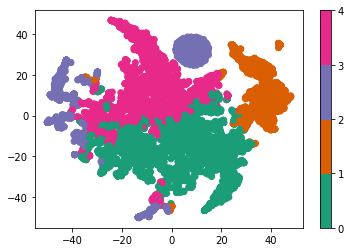

In [302]:
# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
plt.scatter(vis_x, vis_y, c=labels, cmap=plt.cm.get_cmap("Dark2"))
plt.colorbar(boundaries=[0,1,2,3,4])
plt.clim(-0.5, 9.5)
plt.savefig('tsne.jpg', dpi=300)
plt.show()


In [284]:
# #this didn't work

# # randomly choose a news (within a topic) coordinate as the crucial words coordinate
# topic_coord = np.empty((dtm_lsa.shape[1], 2)) * np.nan
# for topic_num in _lsa_keys:
#     if not np.isnan(topic_coord).any():
#         break
#     topic_coord[topic_num] = tsne_lsa[_lsa_keys.index(topic_num)]

# # plot crucial words
# for i in range(dtm_lsa.shape[1]):
#     plot_lsa.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]])

# # hover tools
# hover = plot_lsa.select(dict(type=HoverTool))
# hover.tooltips = {"content": "@content - topic: @topic_key"}




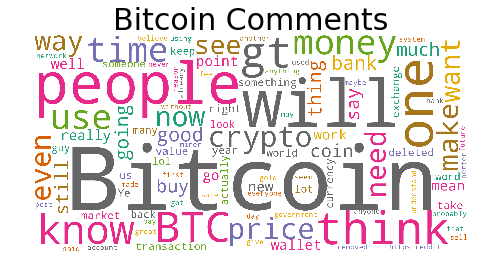

In [252]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# in this section you can just use stopwords I created my own stopwords 'add_stop_words'
# HINT: Fork Alice's repo 'nlp-in-python-tutorial' to see how to add additional stop words can be created
#stopwords = stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)  
wc = WordCloud(width=1600, height=800, 
               background_color='white', max_words=100, stopwords=STOPWORDS, colormap ='Dark2_r')
wc.generate(' '.join(comments.sample(10000).str.replace('\n', ' ').values.tolist()))
wc.to_file('wordcloud.jpg')
plt.figure(figsize=(15,4))
plt.imshow(wc)
plt.axis("off")
#plt.savefig("bitcoin_comments"+".png", bbox_inches='tight', dpi=300)
plt.title("Bitcoin Comments", fontsize=30)
plt.show()
plt.close()

In [6]:
#import spacy

In [16]:
#from spacy import displacy

In [8]:
#nlp = spacy.load('en_core_web_sm')

In [17]:
#doc = comments.apply(lambda x: nlp(x))

In [334]:
# price = pd.read_csv('/Users/jonathandawson/Downloads/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv')
# price.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
# price.dropna(inplace=True)

In [337]:
# price.shape

(1907397, 8)

In [346]:
!date -j -f "%D %X %Z" "04/01/18 00:00:00 GMT" "+%s"
!date -j -f "%D %X %Z" "05/31/18 23:59:59 GMT" "+%s"

1522540800
1527811199


In [347]:
# price = price[(price.Timestamp >= 1522540800) & (price.Timestamp < 1527811199)]
# price.shape

(87640, 8)

In [360]:
# price.memory_usage(index=True, deep=True).sum()

6310080

In [361]:
# import sys
# sys.getsizeof(price) 

6310104

In [362]:
# price.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87640 entries, 1693793 to 1781632
Data columns (total 8 columns):
Timestamp            87640 non-null int64
Open                 87640 non-null float64
High                 87640 non-null float64
Low                  87640 non-null float64
Close                87640 non-null float64
Volume_(BTC)         87640 non-null float64
Volume_(Currency)    87640 non-null float64
Weighted_Price       87640 non-null float64
dtypes: float64(7), int64(1)
memory usage: 6.0 MB


In [363]:
# price.to_csv('price_apr_may_2018.csv')

In [364]:
# %reset_selective price

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [42]:
price = pd.read_csv('price_apr_may_2018.csv')

In [43]:
price.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87640 entries, 0 to 87639
Data columns (total 9 columns):
Unnamed: 0           87640 non-null int64
Timestamp            87640 non-null int64
Open                 87640 non-null float64
High                 87640 non-null float64
Low                  87640 non-null float64
Close                87640 non-null float64
Volume_(BTC)         87640 non-null float64
Volume_(Currency)    87640 non-null float64
Weighted_Price       87640 non-null float64
dtypes: float64(7), int64(2)
memory usage: 6.0 MB


In [81]:
!date -j -f "%D %X %Z" "04/30/18 23:59:59 GMT" "+%s"

1525132799


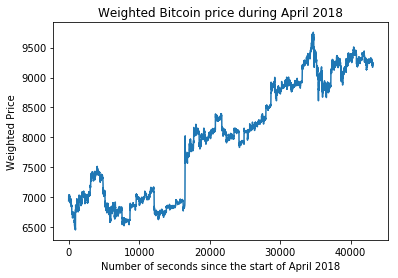

In [242]:
# chart of each topic over the course of time compared to the price
plt.plot(price[price.Timestamp < 1525132799].Weighted_Price)
plt.xlabel('Number of seconds since the start of April 2018')
plt.ylabel('Weighted Price')
plt.title('Weighted Bitcoin price during April 2018')
plt.savefig('btc_apr_2018.jpg', dpi=300)

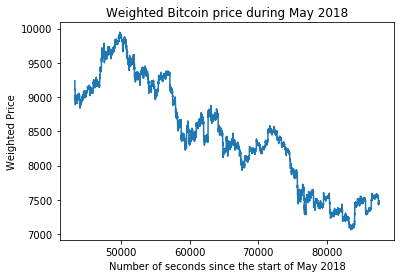

In [243]:
# chart of each topic over the course of time compared to the price
plt.plot(price[price.Timestamp > 1525132800].Weighted_Price)
plt.xlabel('Number of seconds since the start of May 2018')
plt.ylabel('Weighted Price')
plt.title('Weighted Bitcoin price during May 2018')
plt.savefig('btc_may_2018.jpg', dpi=300)

In [787]:
dtm_lsa_df = pd.DataFrame(dtm_lsa, columns=['topic_'+str(x) for x in range(5)])
dtm_lsa_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.959903,0.188000,-0.157227,0.078015,-0.111514
1,0.917952,0.025854,-0.339378,-0.086876,0.184313
2,0.493940,0.261457,-0.190383,-0.630321,0.504098
3,0.697769,0.179125,-0.348932,0.443067,-0.403696
4,0.754413,-0.123530,-0.466295,0.419063,0.150186


In [788]:
dtm_lsa_df.shape

(9288, 5)

In [649]:
dtm_lsa_df.loc[:,'topic_0':'topic_4'].apply(lambda row: np.argmax(row), axis=1).value_counts().index[0]

/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'topic_0'

In [572]:
bitcoin_reddit_comments.iloc[comments_preprocessed.index].created_utc.head()


81629    1525981008
87997    1526855135
52498    1526087774
78366    1527325015
4613     1527311488
Name: created_utc, dtype: int64

In [573]:
pd.DataFrame(data={'comments':comments_preprocessed,
                   'timestamp':bitcoin_reddit_comments.iloc[comments_preprocessed.index].created_utc
                  }
            ).head()

,comments,timestamp
81629,if you open a store front and invite anyone an...,1525981008
87997,lightning network beeyotch learn it live it...,1526855135
52498,yeah i know i was being a bit sarcastic,1526087774
78366,the trademark in question is here they have...,1527325015
4613,no we wont thats the whole point of the unkno...,1527311488


In [789]:
dtm_lsa_df['timestamp'] = bitcoin_reddit_comments.iloc[comments_preprocessed.index].created_utc.values
dtm_lsa_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,timestamp
0,0.959903,0.188000,-0.157227,0.078015,-0.111514,1525981008
1,0.917952,0.025854,-0.339378,-0.086876,0.184313,1526855135
2,0.493940,0.261457,-0.190383,-0.630321,0.504098,1526087774
3,0.697769,0.179125,-0.348932,0.443067,-0.403696,1527325015
4,0.754413,-0.123530,-0.466295,0.419063,0.150186,1527311488


In [761]:
dtm_lsa_df.sort_values('timestamp', ascending=True).head()

,topic_0,topic_1,topic_2,topic_3,topic_4,timestamp
5878,0.907917,-0.139239,-0.022370,-0.016349,-0.394375,1525132810
6450,0.699116,-0.694475,-0.170087,-0.002393,-0.002426,1525133661
6395,0.970009,0.178796,-0.010759,-0.030665,-0.161424,1525133694
8433,0.826770,0.557632,0.027789,-0.036026,0.058553,1525134095
9013,0.907356,0.408587,0.071246,-0.049696,0.047079,1525134394


In [164]:
!date -r 1525132810 -v 7d "+%s"

1523145610


In [180]:
!date -j -f "%D %X %Z" "05/01/18 00:00:00 GMT" "+%s"


1525132800


In [188]:
initial = 1525132800 # May 1, 2018
seconds_in_3_days = 60*60*24*3
timestamps_3_days = [initial+seconds_in_3_days*i for i in range(11)]
# create a list of tuples representing the start and stop of each time period
start_stop_list = list(zip(timestamps_3_days[:-1], timestamps_3_days[1:]))
start_stop_list

[(1525132800, 1525392000),
 (1525392000, 1525651200),
 (1525651200, 1525910400),
 (1525910400, 1526169600),
 (1526169600, 1526428800),
 (1526428800, 1526688000),
 (1526688000, 1526947200),
 (1526947200, 1527206400),
 (1527206400, 1527465600),
 (1527465600, 1527724800)]

In [602]:
dtm_lsa_df.head().loc[:,'topic_0':'topic_4'].iloc[0]

/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  if __name__ == '__main__':


'topic_0'

In [806]:
temp = dtm_lsa_df.join(comments_filtered.reset_index(drop=True,inplace=False))
temp['highest'] = temp.loc[:,'topic_0':'topic_4'].apply(lambda row: np.argmax(row), axis=1)
for x in range(5):
    print(temp[temp['highest']=='topic_'+str(x)].sample(5).body.values)
    print('end\n')

/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


['Found 3rd place. '
 'Third world country and third world bank. Luckily I dodged a bullet when I tried to open an account with them; luckily they were so inept they failed to open the account. '
 'It’s not too difficult to classify. They are just too ill-equipped to do so.'
 'Hohoho'
 "Who's *they* though? I feel like every fucking day I have to remind people that BCH supporters, **just like BTC supporters** are not homogenous group. I roll my eyes every time Ver does anything, and I think Craig Wright is a complete fraud, yet I still believe in BCH and the general road map of on chain scaling. They don't speak for the project as a whole and they absolutely do not speak for me."]
end

['currently only RENDEZVOUS room is live ... there is a schedule in the same page that you should check'
 'You guys should have listened to me as well'
 'Have a question: I just started using Armory and just generated offline address to receive BitCoin. Do I have to download all previous transaction with

In [790]:
for period in start_stop_list:
    print(dtm_lsa_df[(dtm_lsa_df.timestamp > period[0]) & (dtm_lsa_df.timestamp < period[1])]\
        .loc[:,'topic_0':'topic_4']\
        .apply(lambda row: np.argmax(row), axis=1)\
        .value_counts().values)

/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


[828  44  25  22  18]
[757  28  27  20  15]
[853  27  25  18  14]
[780  31  30  25   9]
[868  29  24  23  17]
[820  27  26  16  11]
[784  32  16  15   9]
[854  37  31  26   9]
[759  27  16  15  12]
[849  25  22  18  12]


In [204]:
result = []
for period in start_stop_list:
    result.append(dtm_lsa_df[(dtm_lsa_df.timestamp > period[0]) & (dtm_lsa_df.timestamp < period[1])]\
        .loc[:,'topic_0':'topic_4']\
        .apply(lambda row: np.argmax(row), axis=1)\
        .value_counts()\
        .values)
result

/Users/jonathandawson/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


[array([262, 226, 188, 147, 114]),
 array([221, 206, 168, 151, 101]),
 array([284, 218, 184, 144, 107]),
 array([229, 189, 170, 160, 127]),
 array([276, 222, 210, 139, 114]),
 array([261, 211, 179, 150,  99]),
 array([236, 203, 156, 137, 124]),
 array([267, 196, 187, 161, 146]),
 array([228, 178, 173, 140, 110]),
 array([291, 182, 180, 148, 125])]

In [436]:
x_val = [x for x in range(len(result))]
transpose = []
for i in range(len(result[0])):
    transpose.append([line[i] for line in result])
transpose

[[262, 221, 284, 229, 276, 261, 236, 267, 228, 291],
 [226, 206, 218, 189, 222, 211, 203, 196, 178, 182],
 [188, 168, 184, 170, 210, 179, 156, 187, 173, 180],
 [147, 151, 144, 160, 139, 150, 137, 161, 140, 148],
 [114, 101, 107, 127, 114, 99, 124, 146, 110, 125]]

In [441]:
topic_names = ['Promoters', 'Skeptics', 'Researchers', 'Reactionaries', 'Downers']

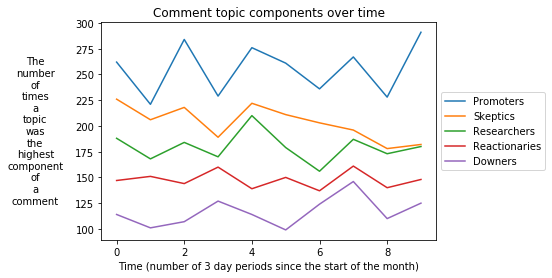

In [452]:
for i, row in enumerate(transpose):
    plt.plot(x_val, row, label=topic_names[i])
plt.xlabel('Time (number of 3 day periods since the start of the month)')
plt.ylabel('\n'.join('The number of times a topic was the highest component of a comment'.split(' ')), 
           rotation='horizontal',
           labelpad=40,
           horizontalalignment='center',
           verticalalignment='center')
plt.title('Comment topic components over time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('topics_time.jpg', dpi=300, bbox_inches='tight')

In [791]:
dtm_lsa_label = dtm_lsa_df.join(pd.DataFrame(data={'label':labels}))
dtm_lsa_label.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,timestamp,label
0,0.959903,0.188000,-0.157227,0.078015,-0.111514,1525981008,4
1,0.917952,0.025854,-0.339378,-0.086876,0.184313,1526855135,1
2,0.493940,0.261457,-0.190383,-0.630321,0.504098,1526087774,4
3,0.697769,0.179125,-0.348932,0.443067,-0.403696,1527325015,1
4,0.754413,-0.123530,-0.466295,0.419063,0.150186,1527311488,1


In [605]:
result2 = []
for period in start_stop_list:
    result2.append(dtm_lsa_label[(dtm_lsa_label.timestamp > period[0]) & (dtm_lsa_label.timestamp < period[1])]\
        .label
        .value_counts()\
        .values)
result2

[array([364, 267, 159,  74,  73]),
 array([352, 243, 128,  62,  62]),
 array([375, 320, 128,  61,  53]),
 array([367, 254, 103,  80,  71]),
 array([381, 291, 150,  74,  65]),
 array([337, 296, 133,  76,  58]),
 array([321, 307,  96,  69,  63]),
 array([392, 294, 130,  73,  68]),
 array([332, 256, 126,  64,  51]),
 array([378, 293, 115,  72,  68])]

In [714]:
[dtm_lsa_label[dtm_lsa_label['topic_'+str(i)]==dtm_lsa_label.max()[i]].index[0] for i in range(5)]


[7206, 2024, 586, 1542, 649]

In [716]:
comments_filtered.reset_index(drop=True,inplace=False).iloc[[7206, 2024, 586, 1542, 649]].values

array(['The idea is for the US government to repay the debt AFTER inflation has reduced the value of the dollar. It would be much much harder to pay down the debt with a non-inflationary currency such as Bitcoin. If you believe that the US government will need inflation in order for it to be able to pay the debt, as I do, then buying Bitcoin now is one way to go.',
       'I submitted it first you shitbot. ', 'all in again with BTC!',
       'Good to see a fellow member displaying it proudly.', 'Yes. '],
      dtype=object)

In [792]:
dtm_lsa_doc = dtm_lsa_label.join(comments_filtered.reset_index(drop=True,inplace=False))
dtm_lsa_doc.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,timestamp,label,body
0,0.959903,0.188000,-0.157227,0.078015,-0.111514,1525981008,4,If you open a store front and invite anyone an...
1,0.917952,0.025854,-0.339378,-0.086876,0.184313,1526855135,1,"Lightning Network, beeyotch. Learn it, live it..."
2,0.493940,0.261457,-0.190383,-0.630321,0.504098,1526087774,4,Yeah I know - I was being a bit sarcastic.
3,0.697769,0.179125,-0.348932,0.443067,-0.403696,1527325015,1,The trademark in question is here: They have...
4,0.754413,-0.123530,-0.466295,0.419063,0.150186,1527311488,1,"No we wont, thats the whole point of the unkno..."


In [793]:
max_doc = dtm_lsa_doc[dtm_lsa_doc.body.str.len() > 120].max()


In [794]:
[dtm_lsa_doc[dtm_lsa_label['topic_'+str(i)]==max_doc[i]].body.values[0] for i in range(5)]

["Too many young people posting memes.   1980: Computers are a miracle (about 4 years after Apple formed)  1990: Recession sucks, but this internet thing is pretty interesting. Look, a browser.   2000: Let's overthrow the old economy, everything will go online!!!!!!!!  2010: Capitalism is dead.  2017: Let's over throw the old economy, Bitcoin is going over $100K!!!!!!!!!!!  2020: Capitalism is dead",
 'This topic has been submitted several times. Please check the front page of /r/Bitcoin for previous submissions, as well as /r/Bitcoin/new. You can also try using the search bar. Thank you.             [       ',
 "I hate Roger so much I see red everytime I hear the name Roger now.   I broke up with my girlfriend because her brother's name was Roger, fuck ALL Rogers, am I right!",
 'I really would need a good introduction video in German. A lot of people that i want to intorduce to Bitcoin are just not good enough in english that they would understand a english introduction video:/ ',
 '

In [422]:
'\n'.join('The number of times a topic was the highest component of a comment'.split(' '))

'The\nnumber\nof\ntimes\na\ntopic\nwas\nthe\nhighest\ncomponent\nof\na\ncomment'